In [ ]:
# DataSet => 1.placement.csv, 2.water_potability.csv, 3.Travel.csv, 4.train.csv, 5.cars.csv, 
    # 6.customer.csv, 7.loan_prediction.csv, 8.Telecom_customer_churn.csv
    # 9.wine_data.csv, 10.Data_Train.xlsx, 11.Social_Network_Ads.csv, 12.HR-Employee-Attrition.csv

In [1]:
# Start Day1 --> Revision

# Outliers (detect and remove) --> 
   # Three methods -: 1.IQR, 2.Three sigma method, 3. ZScore method.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('placement.csv')
df.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


In [4]:
df.notna().sum()

cgpa                    1000
placement_exam_marks    1000
placed                  1000
dtype: int64

In [5]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [6]:
# create boxplot and distribution plot-- it show skewness

<Axes: xlabel='cgpa', ylabel='Density'>

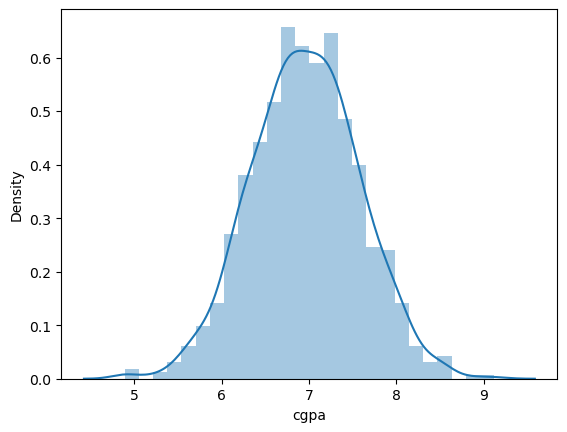

In [7]:
sns.distplot(df['cgpa'])

<Axes: ylabel='cgpa'>

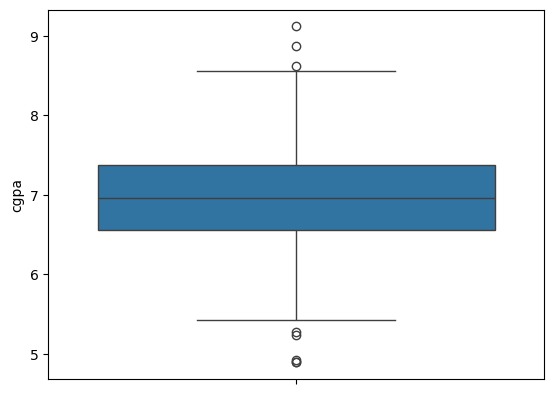

In [8]:
sns.boxplot(df['cgpa'])

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

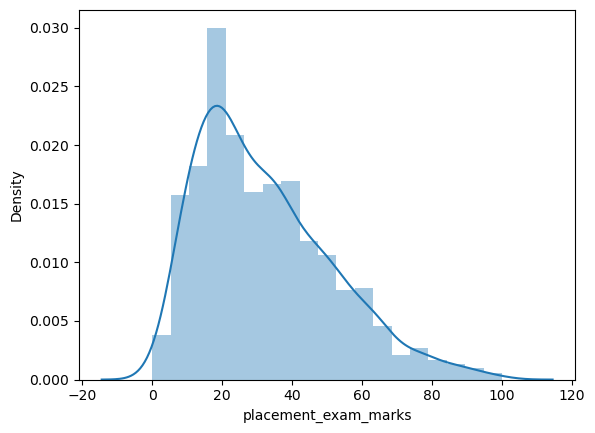

In [9]:
sns.distplot(df['placement_exam_marks'])

<Axes: ylabel='placement_exam_marks'>

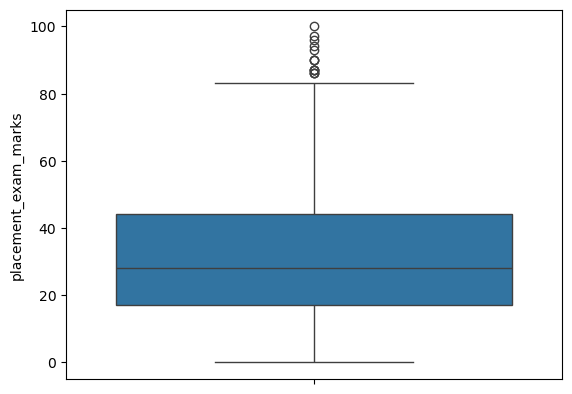

In [10]:
sns.boxplot(df['placement_exam_marks'])

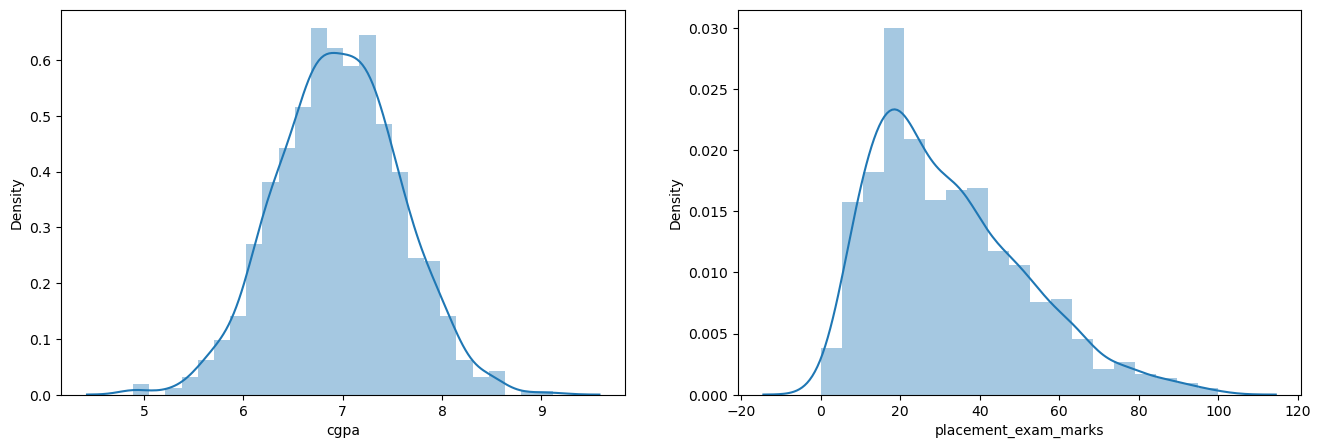

In [11]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [12]:
# Detect Outliers 
 # Let's find IQR for "cgpa"

# Lower Quartile
q1_cgpa = df['cgpa'].quantile(0.25) # use quantile for code but for learn quartile.

# Upper Quartile
q3_cgpa = df['cgpa'].quantile(0.75)

print('Q1: ', q1_cgpa)
print('Q3: ', q3_cgpa)

# IQR = Q3 - Q1
IQR_cgpa = q3_cgpa - q1_cgpa
print("IQR: ", IQR_cgpa)

Q1:  6.55
Q3:  7.37
IQR:  0.8200000000000003


In [13]:
# Let's find number of outliers --> find lower limit, and upper limit

outlier_lower_limit = q1_cgpa - 1.5 * IQR_cgpa
outlier_upper_limit = q3_cgpa + 1.5 * IQR_cgpa

print('outlier_lower_limit: ', outlier_lower_limit)
print('outlier_upper_limit: ', outlier_upper_limit)

outlier_lower_limit:  5.319999999999999
outlier_upper_limit:  8.600000000000001


In [14]:
df[df['cgpa'] > outlier_upper_limit]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
998,8.62,46.0,1


In [15]:
df[df['cgpa'] < outlier_lower_limit]

,cgpa,placement_exam_marks,placed
278,5.23,17.0,1
485,4.92,44.0,1
815,5.27,43.0,0
997,4.89,34.0,0
999,4.90,10.0,1


In [16]:
data_df = df[(df.cgpa > outlier_lower_limit) & (df.cgpa < outlier_upper_limit)]
data_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [17]:
df.shape

(1000, 3)

In [18]:
data_df.shape

(992, 3)

<Axes: ylabel='cgpa'>

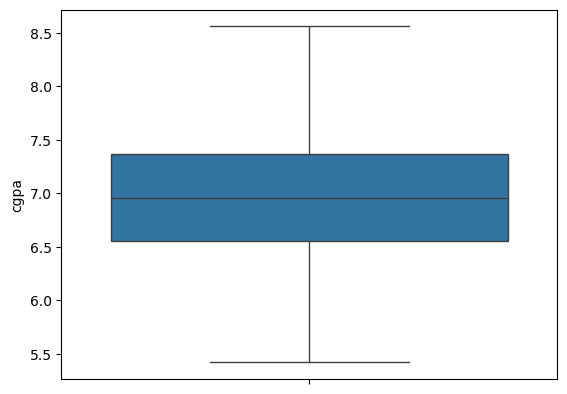

In [19]:
sns.boxplot(data_df['cgpa'])

In [20]:
# Detect Outliers 
 # Let's find IQR for "placement_exam_marks"

q1_placement_exam_marks = df['placement_exam_marks'].quantile(0.25)
print('Q1: ', q1_placement_exam_marks)

q3_placement_exam_marks = df['placement_exam_marks'].quantile(0.75)
print('Q3: ', q3_placement_exam_marks)

IQR_placement_exam_marks = q3_placement_exam_marks - q1_placement_exam_marks
print('IQR: ', IQR_placement_exam_marks)

Q1:  17.0
Q3:  44.0
IQR:  27.0


In [21]:
outlier_lower_limit = q1_placement_exam_marks - 1.5 * IQR_placement_exam_marks
outlier_upper_limit = q3_placement_exam_marks + 1.5 * IQR_placement_exam_marks

print('Outlier lower limit: ', outlier_lower_limit)
print('Outlier upper limit: ', outlier_upper_limit)

Outlier lower limit:  -23.5
Outlier upper limit:  84.5


In [22]:
df[df['placement_exam_marks'] > outlier_upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [23]:
df[df['placement_exam_marks'] < outlier_lower_limit]

,cgpa,placement_exam_marks,placed


In [24]:
data_df1 = df[(df.placement_exam_marks > outlier_lower_limit) & (df.placement_exam_marks < outlier_upper_limit)]
data_df1.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [25]:
df.shape

(1000, 3)

In [26]:
data_df1.shape

(985, 3)

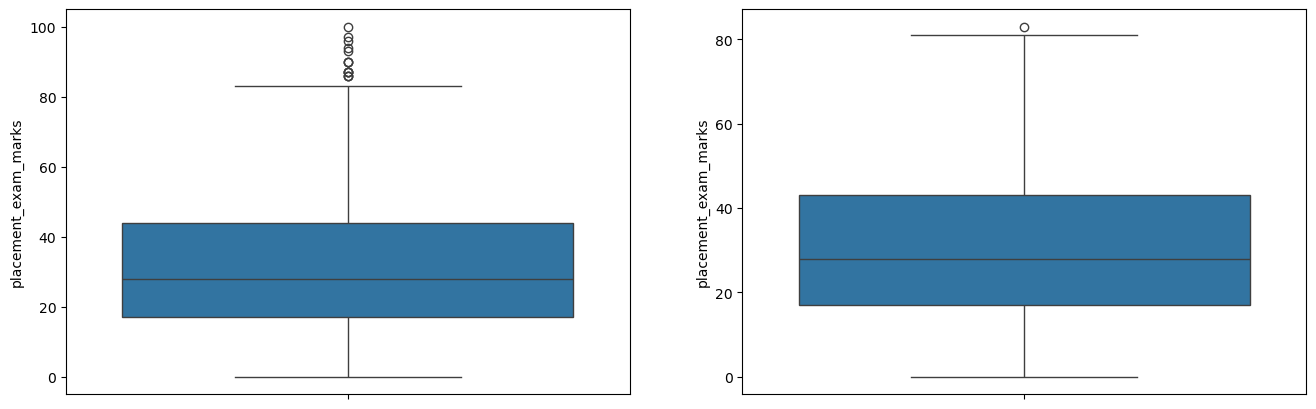

In [27]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.boxplot(data_df1['placement_exam_marks'])

plt.show()

In [ ]:
# work completed ---------------------------------------

In [ ]:
######################################################333

In [28]:
# Same work on "water_potability" & "winequality" find outliers --->> 
   # check outliers in each and every columns.

In [29]:
# Working on "water_potability.csv"
df1 = pd.read_csv('water_potability.csv')
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [30]:
df1.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [31]:
df1.fillna(df1.mean(), inplace = True)

In [32]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

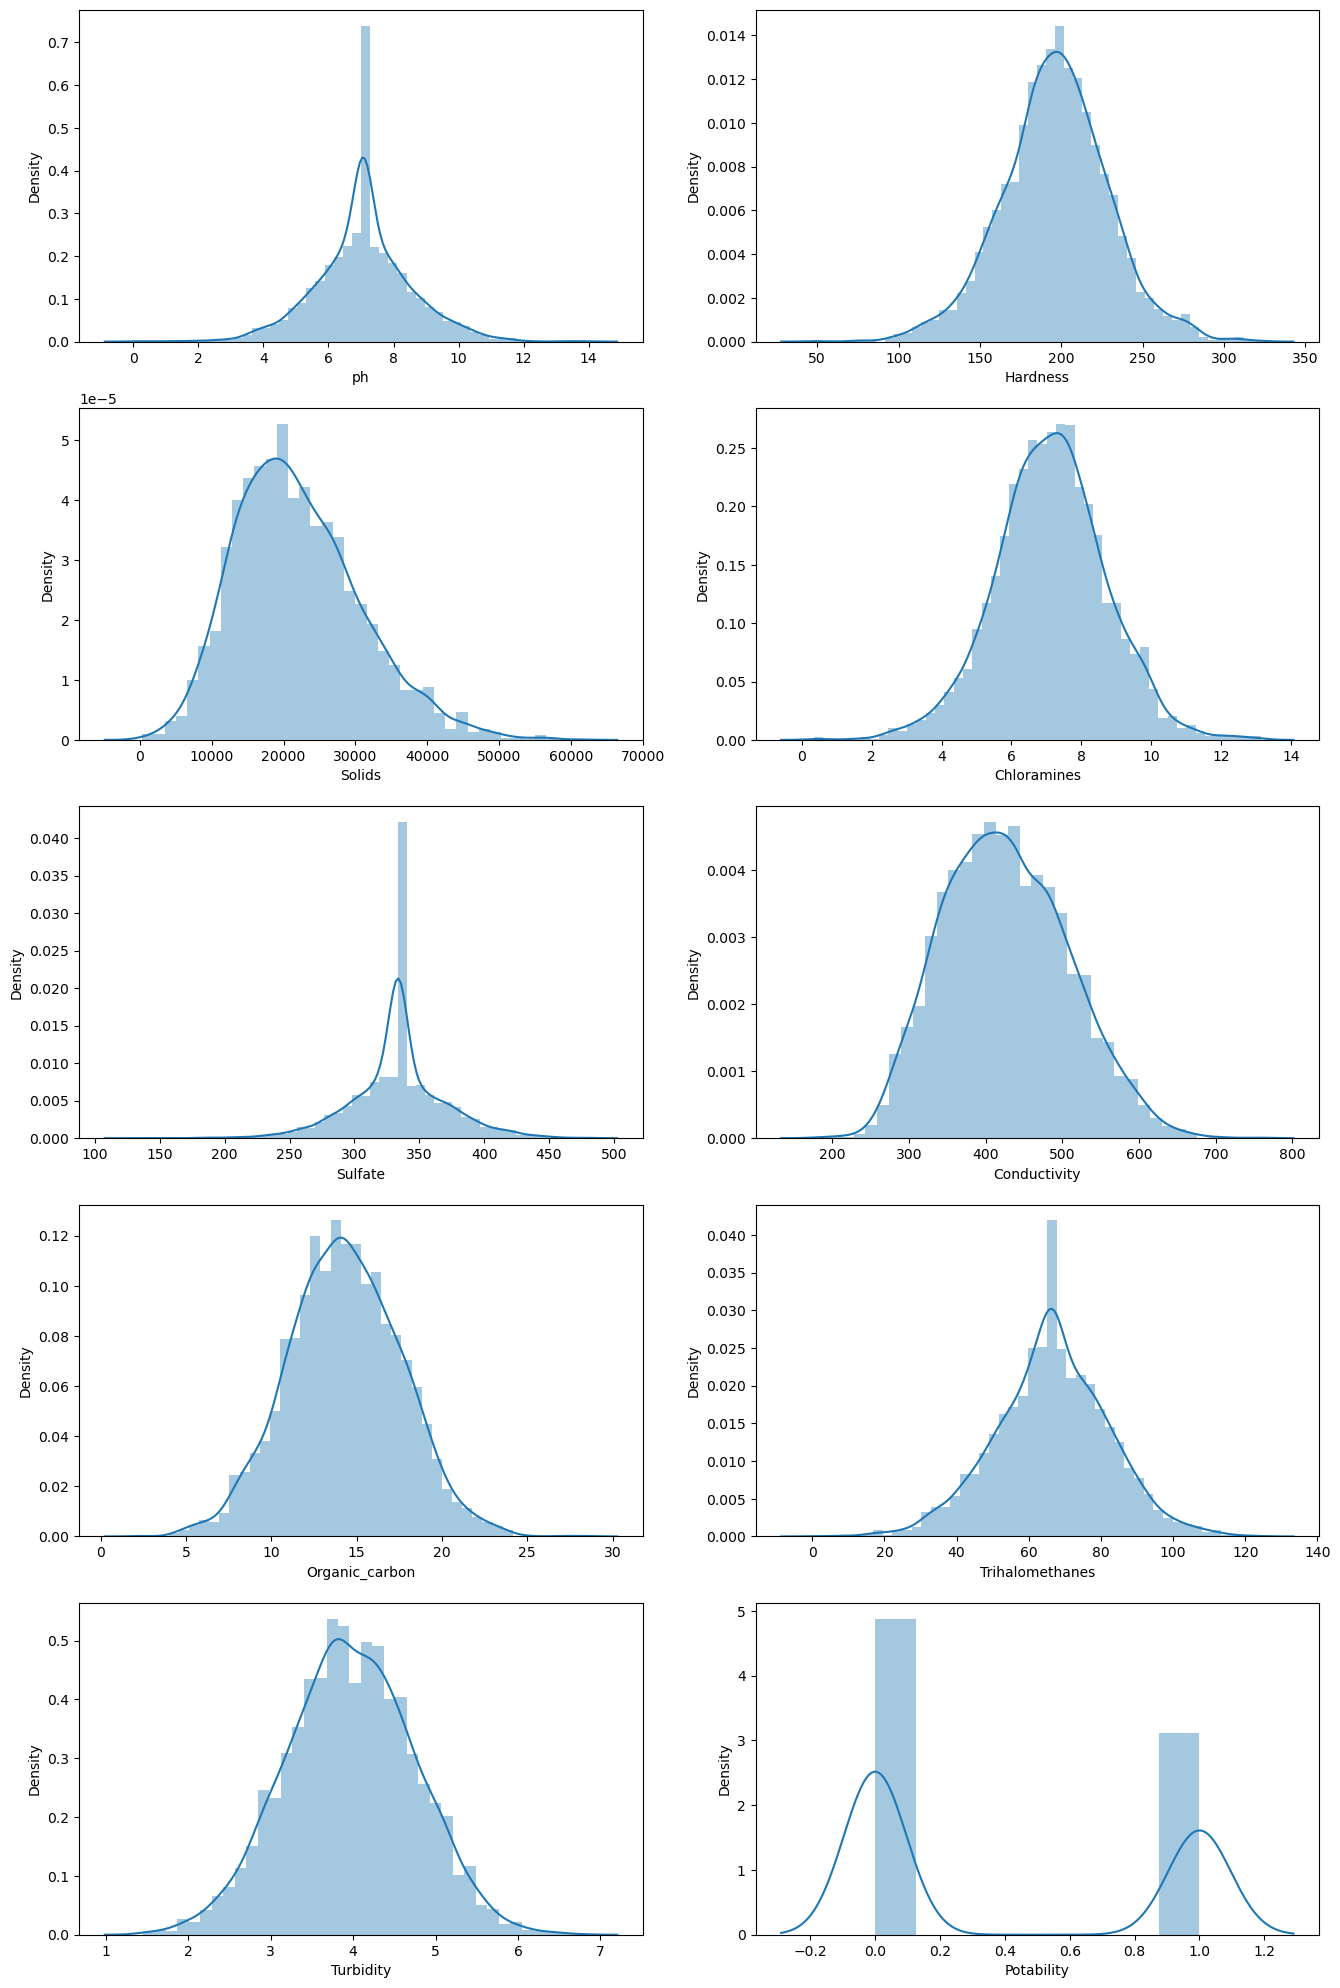

In [33]:
# Distribution chart for check skewness.

plt.figure(figsize = (16,25))

plt.subplot(5,2,1)
sns.distplot(df1['ph'])

plt.subplot(5,2,2)
sns.distplot(df1['Hardness'])

plt.subplot(5,2,3)
sns.distplot(df1['Solids'])

plt.subplot(5,2,4)
sns.distplot(df1['Chloramines'])

plt.subplot(5,2,5)
sns.distplot(df1['Sulfate'])

plt.subplot(5,2,6)
sns.distplot(df1['Conductivity'])

plt.subplot(5,2,7)
sns.distplot(df1['Organic_carbon'])

plt.subplot(5,2,8)
sns.distplot(df1['Trihalomethanes'])

plt.subplot(5,2,9)
sns.distplot(df1['Turbidity'])

plt.subplot(5,2,10)
sns.distplot(df1['Potability'])

plt.show()

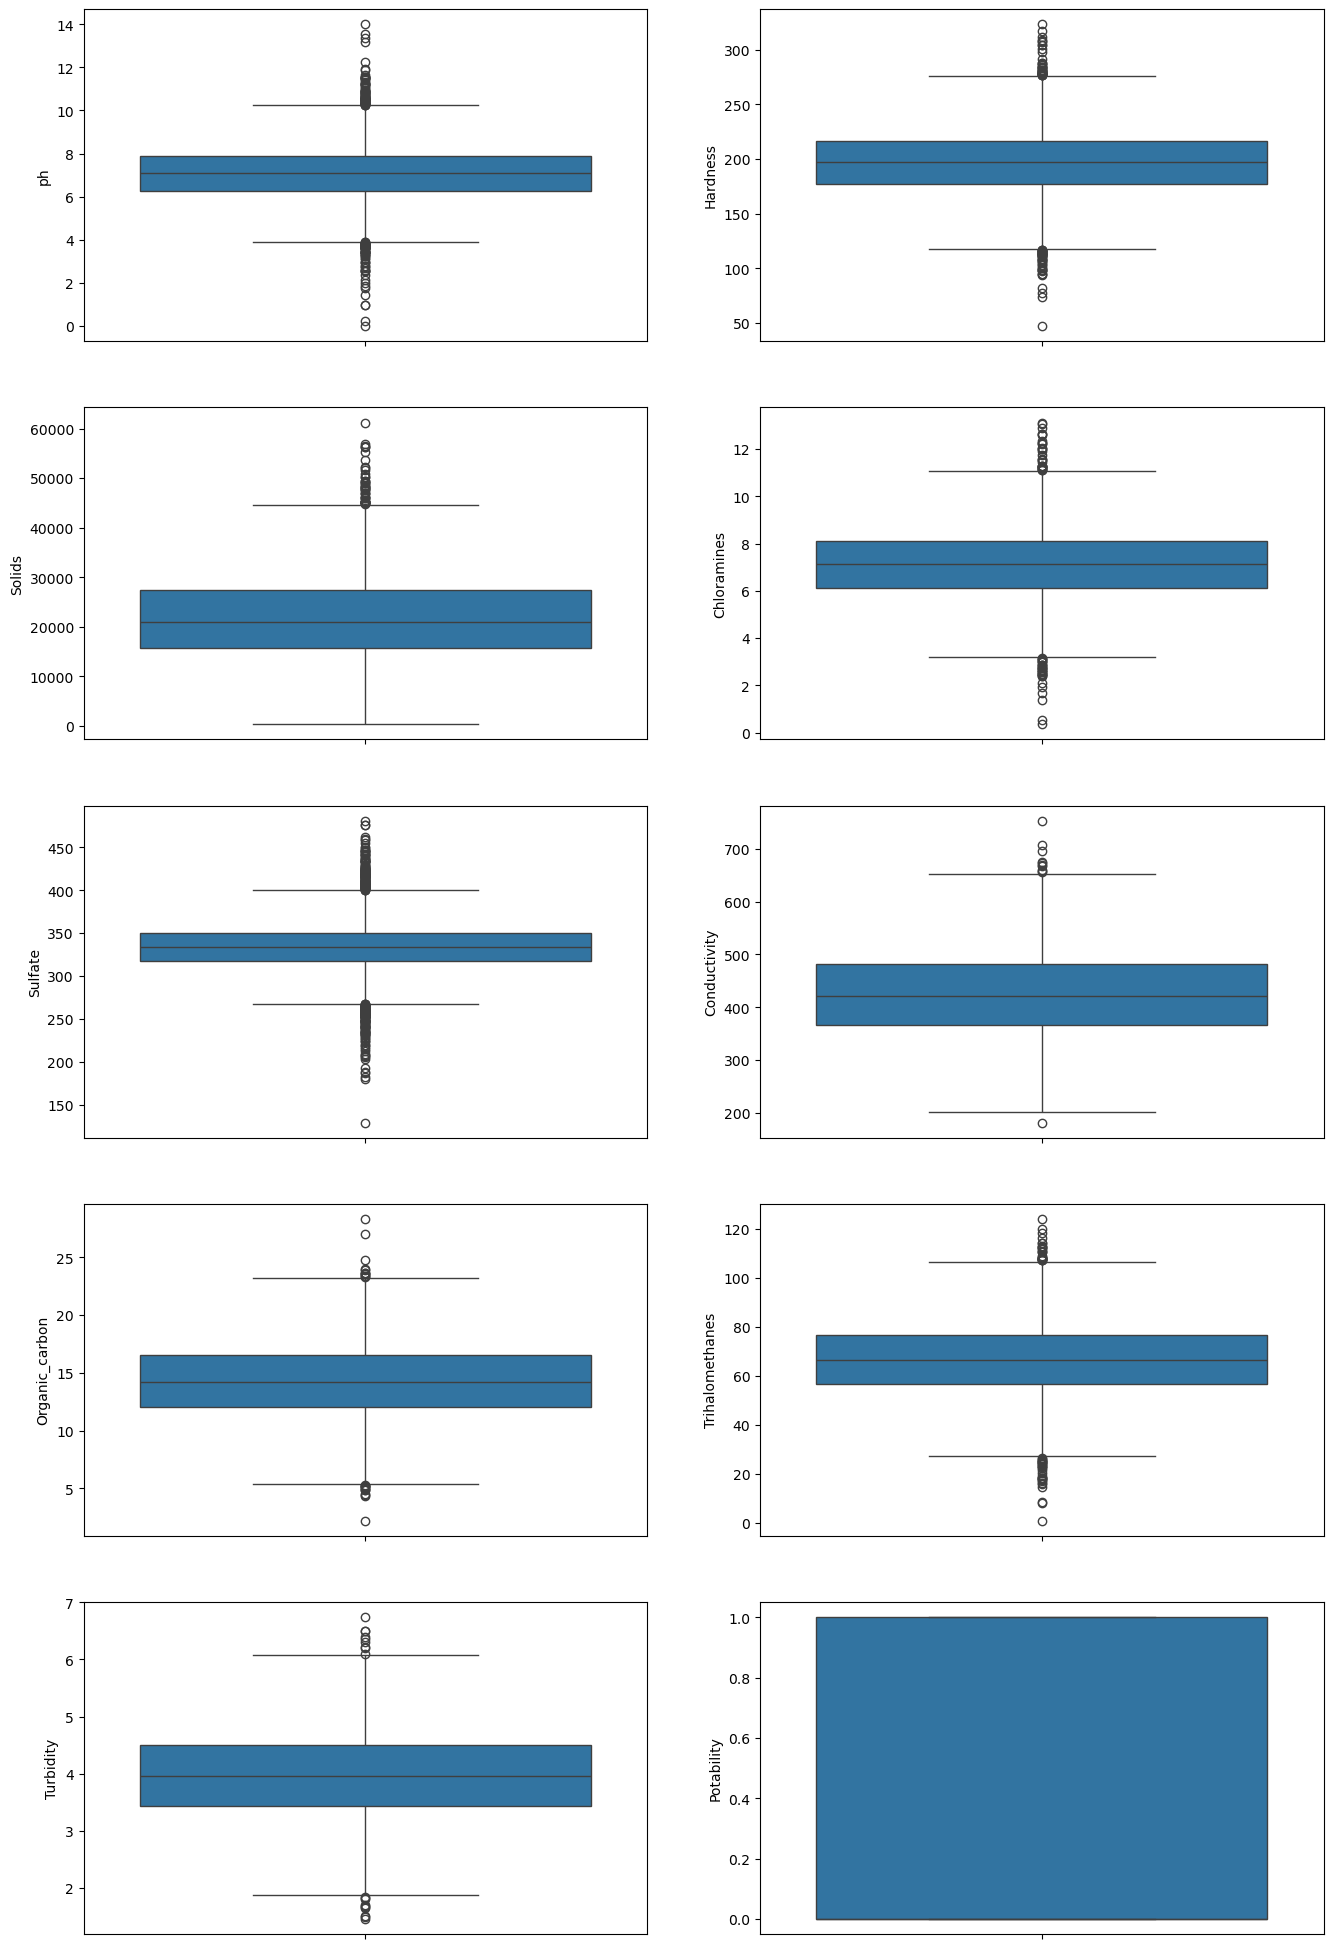

In [34]:
# Box plot chart for check outliers.

plt.figure(figsize = (16,25))

plt.subplot(5,2,1)
sns.boxplot(df1['ph'])

plt.subplot(5,2,2)
sns.boxplot(df1['Hardness'])

plt.subplot(5,2,3)
sns.boxplot(df1['Solids'])

plt.subplot(5,2,4)
sns.boxplot(df1['Chloramines'])

plt.subplot(5,2,5)
sns.boxplot(df1['Sulfate'])

plt.subplot(5,2,6)
sns.boxplot(df1['Conductivity'])

plt.subplot(5,2,7)
sns.boxplot(df1['Organic_carbon'])

plt.subplot(5,2,8)
sns.boxplot(df1['Trihalomethanes'])

plt.subplot(5,2,9)
sns.boxplot(df1['Turbidity'])

plt.subplot(5,2,10)
sns.boxplot(df1['Potability'])

plt.show()

In [35]:
# Find IQR

q1_ph = df1['ph'].quantile(0.25)
print('Q1_ph: ', q1_ph)
q3_ph = df1['ph'].quantile(0.75)
print('Q3_ph: ', q3_ph)
IQR_ph = q3_ph - q1_ph
print('IQR_ph: ', IQR_ph)
print()

q1_Hardness = df1['Hardness'].quantile(0.25)
print('Q1_Hardness: ', q1_Hardness)
q3_Hardness = df1['Hardness'].quantile(0.75)
print('Q3_Hardness: ', q3_Hardness)
IQR_Hardness = q3_Hardness - q1_Hardness
print('IQR_Hardness: ', IQR_Hardness)
print()

q1_Solids = df1['Solids'].quantile(0.25)
print('Q1_Solids: ', q1_Solids)
q3_Solids = df1['Solids'].quantile(0.75)
print('Q3_Solids: ', q3_Solids)
IQR_Solids = q3_Solids - q1_Solids
print('IQR_Solids: ', IQR_Solids)
print()

q1_Chloramines = df1['Chloramines'].quantile(0.25)
print('Q1_Chloramines: ', q1_Chloramines)
q3_Chloramines = df1['Chloramines'].quantile(0.75)
print('Q3_Chloramines: ', q3_Chloramines)
IQR_Chloramines = q3_Chloramines - q1_Chloramines
print('IQR_Chloramines: ', IQR_Chloramines)
print()

q1_Sulfate = df1['Sulfate'].quantile(0.25)
print('Q1_Sulfate: ', q1_Sulfate)
q3_Sulfate = df1['Sulfate'].quantile(0.75)
print('Q3_Sulfate: ', q3_Sulfate)
IQR_Sulfate = q3_Sulfate - q1_Sulfate
print('IQR_Sulfate: ', IQR_Sulfate)
print()

q1_Conductivity = df1['Conductivity'].quantile(0.25)
print('Q1_Conductivity: ', q1_Conductivity)
q3_Conductivity = df1['Conductivity'].quantile(0.75)
print('Q3_Conductivity: ', q3_Conductivity)
IQR_Conductivity = q3_Conductivity - q1_Conductivity
print('IQR_Conductivity: ', IQR_Conductivity)
print()

q1_Organic_carbon = df1['Organic_carbon'].quantile(0.25)
print('Q1_Organic_carbon: ', q1_Organic_carbon)
q3_Organic_carbon = df1['Organic_carbon'].quantile(0.75)
print('Q3_Organic_carbon: ', q3_Organic_carbon)
IQR_Organic_carbon = q3_Organic_carbon - q1_Organic_carbon
print('IQR_Organic_carbon: ', IQR_Organic_carbon)
print()

q1_Trihalomethanes = df1['Trihalomethanes'].quantile(0.25)
print('Q1_Trihalomethanes: ', q1_Trihalomethanes)
q3_Trihalomethanes = df1['Trihalomethanes'].quantile(0.75)
print('Q3_Trihalomethanes: ', q3_Trihalomethanes)
IQR_Trihalomethanes = q3_Trihalomethanes - q1_Trihalomethanes
print('IQR_Trihalomethanes: ', IQR_Trihalomethanes)
print()

q1_Turbidity = df1['Turbidity'].quantile(0.25)
print('Q1_Turbidity: ', q1_Turbidity)
q3_Turbidity = df1['Turbidity'].quantile(0.75)
print('Q3_Turbidity: ', q3_Turbidity)
IQR_Turbidity = q3_Turbidity - q1_Turbidity
print('IQR_Turbidity: ', IQR_Turbidity)
print()

q1_Potability = df1['Potability'].quantile(0.25)
print('Q1_Potability: ', q1_Potability)
q3_Potability = df1['Potability'].quantile(0.75)
print('Q3_Potability: ', q3_Potability)
IQR_Potability = q3_Potability - q1_Potability
print('IQR_Potability: ', IQR_Potability)

Q1_ph:  6.277672635884397
Q3_ph:  7.870049755247176
IQR_ph:  1.5923771193627791

Q1_Hardness:  176.85053787752437
Q3_Hardness:  216.66745621487073
IQR_Hardness:  39.81691833734635

Q1_Solids:  15666.69029696465
Q3_Solids:  27332.762127438615
IQR_Solids:  11666.071830473964

Q1_Chloramines:  6.1274207554913
Q3_Chloramines:  8.114887032109028
IQR_Chloramines:  1.9874662766177282

Q1_Sulfate:  317.0946377261117
Q3_Sulfate:  350.38575630240354
IQR_Sulfate:  33.29111857629181

Q1_Conductivity:  365.7344141184627
Q3_Conductivity:  481.7923044877282
IQR_Conductivity:  116.05789036926546

Q1_Organic_carbon:  12.065801333613067
Q3_Organic_carbon:  16.557651543843434
IQR_Organic_carbon:  4.491850210230368

Q1_Trihalomethanes:  56.64765567150501
Q3_Trihalomethanes:  76.66660934716015
IQR_Trihalomethanes:  20.01895367565514

Q1_Turbidity:  3.439710869612912
Q3_Turbidity:  4.50031978728511
IQR_Turbidity:  1.060608917672198

Q1_Potability:  0.0
Q3_Potability:  1.0
IQR_Potability:  1.0


In [36]:
lower_limit_ph = q1_ph - 1.5 * IQR_ph
upper_limit_ph = q3_ph + 1.5 * IQR_ph
print('Outlier lower limit ph: ', lower_limit_ph)
print('Outlier upper limit ph: ', upper_limit_ph)
print()


lower_limit_Hardness = q1_Hardness - 1.5 * IQR_Hardness
upper_limit_Hardness = q3_Hardness + 1.5 * IQR_Hardness
print('Outlier lower limit Hardness: ', lower_limit_Hardness)
print('Outlier upper limit Hardness: ', upper_limit_Hardness)
print()


lower_limit_Solids = q1_Solids - 1.5 * IQR_Solids
upper_limit_Solids = q3_Solids + 1.5 * IQR_Solids
print('Outlier lower limit Solids: ', lower_limit_Solids)
print('Outlier upper limit Solids: ', upper_limit_Solids)
print()



lower_limit_Chloramines = q1_Chloramines - 1.5 * IQR_Chloramines
upper_limit_Chloramines = q3_Chloramines + 1.5 * IQR_Chloramines
print('Outlier lower limit Chloramines: ', lower_limit_Chloramines)
print('Outlier upper limit Chloramines: ', upper_limit_Chloramines)
print()



lower_limit_Sulfate = q1_Sulfate - 1.5 * IQR_Sulfate
upper_limit_Sulfate = q3_Sulfate + 1.5 * IQR_Sulfate
print('Outlier lower limit Sulfate: ', lower_limit_Sulfate)
print('Outlier upper limit Sulfate: ', upper_limit_Sulfate)
print()



lower_limit_Conductivity = q1_Conductivity - 1.5 * IQR_Conductivity
upper_limit_Conductivity = q3_Conductivity + 1.5 * IQR_Conductivity
print('Outlier lower limit Conductivity: ', lower_limit_Conductivity)
print('Outlier upper limit Conductivity: ', upper_limit_Conductivity)
print()



lower_limit_Organic_carbon = q1_Organic_carbon - 1.5 * IQR_Organic_carbon
upper_limit_Organic_carbon = q3_Organic_carbon + 1.5 * IQR_Organic_carbon
print('Outlier lower limit Organic_carbon: ', lower_limit_Organic_carbon)
print('Outlier upper limit Organic_carbon: ', upper_limit_Organic_carbon)
print()


lower_limit_Trihalomethanes = q1_Trihalomethanes - 1.5 * IQR_Trihalomethanes
upper_limit_Trihalomethanes = q3_Trihalomethanes + 1.5 * IQR_Trihalomethanes
print('Outlier lower limit Trihalomethanes: ', lower_limit_Trihalomethanes)
print('Outlier upper limit Trihalomethanes: ', upper_limit_Trihalomethanes)
print()


lower_limit_Turbidity = q1_Turbidity - 1.5 * IQR_Turbidity
upper_limit_Turbidity = q3_Turbidity + 1.5 * IQR_Turbidity
print('Outlier lower limit Turbidity: ', lower_limit_Turbidity)
print('Outlier upper limit Turbidity: ', upper_limit_Turbidity)
print()


lower_limit_Potability = q1_Potability - 1.5 * IQR_Potability
upper_limit_Potability = q3_Potability + 1.5 * IQR_Potability
print('Outlier lower limit Potability: ', lower_limit_Potability)
print('Outlier upper limit Potability: ', upper_limit_Potability)

Outlier lower limit ph:  3.889106956840228
Outlier upper limit ph:  10.258615434291345

Outlier lower limit Hardness:  117.12516037150485
Outlier upper limit Hardness:  276.3928337208903

Outlier lower limit Solids:  -1832.4174487462951
Outlier upper limit Solids:  44831.86987314956

Outlier lower limit Chloramines:  3.1462213405647073
Outlier upper limit Chloramines:  11.09608644703562

Outlier lower limit Sulfate:  267.15795986167404
Outlier upper limit Sulfate:  400.3224341668413

Outlier lower limit Conductivity:  191.64757856456453
Outlier upper limit Conductivity:  655.8791400416264

Outlier lower limit Organic_carbon:  5.328026018267515
Outlier upper limit Organic_carbon:  23.295426859188986

Outlier lower limit Trihalomethanes:  26.619225158022296
Outlier upper limit Trihalomethanes:  106.69503986064285

Outlier lower limit Turbidity:  1.8487974931046152
Outlier upper limit Turbidity:  6.091233163793407

Outlier lower limit Potability:  -1.5
Outlier upper limit Potability:  2.5

In [37]:
df1.shape

(3276, 10)

In [38]:
df1.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [39]:
# all outliers not stored in one variable. 
   # Its code not working 

data1_df1 = df1[(df1.ph > lower_limit_ph) & (df1.ph < upper_limit_ph)]

data1_df1 = df1[(df1.Hardness > lower_limit_Hardness) & (df1.Hardness < upper_limit_Hardness)]

data1_df1 = df1[(df1.Solids > lower_limit_Solids) & (df1.Solids < upper_limit_Solids)]

data1_df1 = df1[(df1.Chloramines > lower_limit_Chloramines) & (df1.Chloramines < upper_limit_Chloramines)]

data1_df1 = df1[(df1.Sulfate > lower_limit_Sulfate) & (df1.Sulfate < upper_limit_Sulfate)]

data1_df1 = df1[(df1.Conductivity > lower_limit_Conductivity) & (df1.Conductivity < upper_limit_Conductivity)]

data1_df1 = df1[(df1.Organic_carbon > lower_limit_Organic_carbon) & (df1.Organic_carbon < upper_limit_Organic_carbon)]

data1_df1 = df1[(df1.Trihalomethanes > lower_limit_Trihalomethanes) & (df1.Trihalomethanes < upper_limit_Trihalomethanes)]

data1_df1 = df1[(df1.Turbidity > lower_limit_Turbidity) & (df1.Turbidity < upper_limit_Turbidity)]

data1_df1 = df1[(df1.Potability > lower_limit_Potability) & (df1.Potability < upper_limit_Potability)]

data1_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [40]:
data1_df1.shape

(3276, 10)

In [41]:
df1.shape

(3276, 10)

In [42]:
df1[df1['ph'] > upper_limit_ph]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
32,10.433291,117.791230,22326.892046,8.161505,307.707509,412.986834,12.890709,65.733478,5.057311,0
47,10.682966,173.375498,15758.740621,5.570784,307.352586,323.807913,10.090870,78.472784,3.999775,0
54,10.560745,181.893366,21783.651033,6.991260,340.390378,456.556402,16.482835,34.252049,3.964686,0
125,10.308478,217.219746,27653.235184,8.912266,369.531206,382.951505,6.580402,59.576040,3.285077,0
...,...,...,...,...,...,...,...,...,...,...
3142,10.503787,125.975185,38605.331530,8.710553,333.775777,674.443476,9.714220,51.697894,5.370458,1
3233,10.485604,136.577381,32872.380566,8.399435,276.921835,416.188546,18.884625,60.078413,4.669240,1
3246,10.667364,173.381945,28912.202201,7.071294,276.634391,286.063394,17.685651,55.147364,4.135569,1
3249,10.808157,198.596751,29614.348790,5.782418,304.622061,383.269410,14.902820,47.896406,4.362542,1


In [43]:
df1[df1['ph'] > lower_limit_ph]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [44]:
data1_df = df1[(df1.ph > lower_limit_ph) & (df1.ph < upper_limit_ph)]

In [45]:
data1_df2 = df1[(df1.Hardness > lower_limit_Hardness) & (df1.Hardness < upper_limit_Hardness)]

In [46]:
data1_df3 = df1[(df1.Solids > lower_limit_Solids) & (df1.Solids < upper_limit_Solids)]

In [47]:
data1_df4 = df1[(df1.Chloramines > lower_limit_Chloramines) & (df1.Chloramines < upper_limit_Chloramines)]

In [48]:
data1_df5 = df1[(df1.Sulfate > lower_limit_Sulfate) & (df1.Sulfate < upper_limit_Sulfate)]

In [49]:
data1_df6 = df1[(df1.Conductivity > lower_limit_Conductivity) & (df1.Conductivity < upper_limit_Conductivity)]

In [50]:
data1_df7 = df1[(df1.Organic_carbon > lower_limit_Organic_carbon) & (df1.Organic_carbon < upper_limit_Organic_carbon)]

In [51]:
data1_df8 = df1[(df1.Trihalomethanes > lower_limit_Trihalomethanes) & (df1.Trihalomethanes < upper_limit_Trihalomethanes)]

In [52]:
data1_df9 = df1[(df1.Turbidity > lower_limit_Turbidity) & (df1.Turbidity < upper_limit_Turbidity)]

In [53]:
data1_df10 = df1[(df1.Potability > lower_limit_Potability) & (df1.Potability < upper_limit_Potability)]

In [54]:
data1_df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [55]:
df1.shape

(3276, 10)

In [56]:
data1_df.shape

(3134, 10)

In [57]:
data1_df2.shape

(3193, 10)

In [58]:
data1_df3.shape

(3229, 10)

In [59]:
data1_df4.shape

(3215, 10)

In [60]:
data1_df5.shape

(3012, 10)

In [61]:
data1_df6.shape

(3265, 10)

In [62]:
data1_df7.shape

(3251, 10)

In [63]:
data1_df8.shape

(3222, 10)

In [64]:
data1_df9.shape

(3257, 10)

In [65]:
data1_df10.shape

(3276, 10)

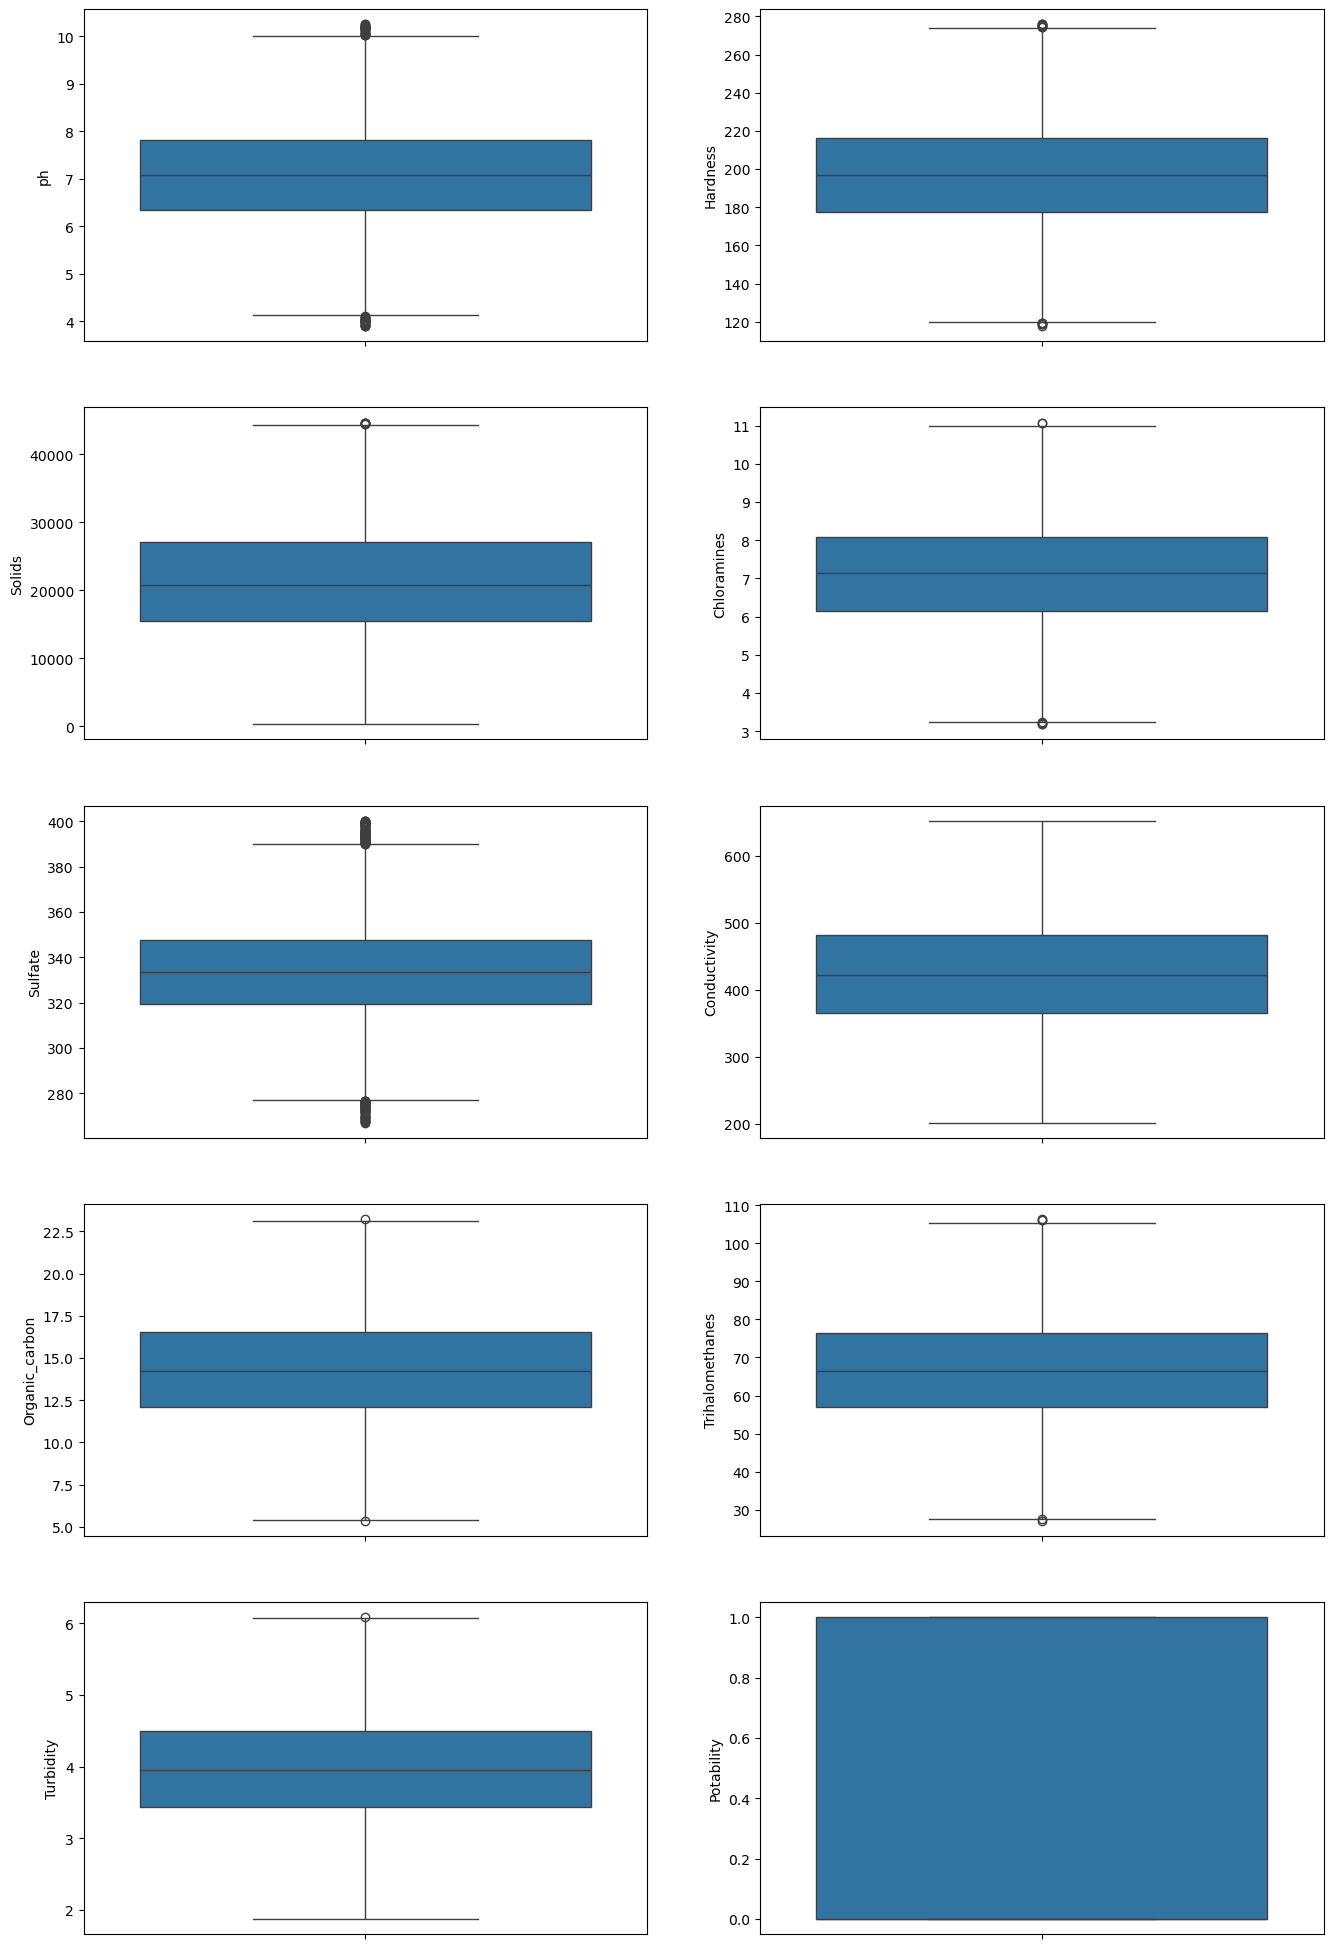

In [66]:
# Box plot chart for check outliers.

plt.figure(figsize = (16,25))

plt.subplot(5,2,1)
sns.boxplot(data1_df['ph'])

plt.subplot(5,2,2)
sns.boxplot(data1_df2['Hardness'])

plt.subplot(5,2,3)
sns.boxplot(data1_df3['Solids'])

plt.subplot(5,2,4)
sns.boxplot(data1_df4['Chloramines'])

plt.subplot(5,2,5)
sns.boxplot(data1_df5['Sulfate'])

plt.subplot(5,2,6)
sns.boxplot(data1_df6['Conductivity'])

plt.subplot(5,2,7)
sns.boxplot(data1_df7['Organic_carbon'])

plt.subplot(5,2,8)
sns.boxplot(data1_df8['Trihalomethanes'])

plt.subplot(5,2,9)
sns.boxplot(data1_df9['Turbidity'])

plt.subplot(5,2,10)
sns.boxplot(data1_df10['Potability'])

plt.show()

In [67]:
# Detect and remove Outliers using "IQR" method --------- Completed day1.

In [68]:
# -------------------------------------------------------------------------------------------------------------------------------------------------------

In [69]:
# Now 2nd method use for detect and remove outliers "Three Sigma method".

In [70]:
# start day2

In [71]:
# Today working on "Travel.csv" ------>> Feature Extraction(Categorical data and Numerical data)

In [72]:
%matplotlib inline 

In [73]:
dd = pd.read_csv("Travel.csv")  
dd.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


In [74]:
dd.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [75]:
dd.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [76]:
# check all the categories
dd['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [77]:
dd['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [78]:
dd['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [79]:
dd['Gender'] = dd['Gender'].replace('Fe Male', 'Female')
dd['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [80]:
dd['MaritalStatus'] = dd['MaritalStatus'].replace('Single', 'Unmarried')
dd['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [81]:
# Missing values in -->> Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, 
                    #    NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome 
# Imputing null values ==> Median(Age, DurationOfPitch, NumberofTrips, MonthlyIncome)
# Mode(TypeofContact, NumberOfFollowups, NumberOfChildrenVisiting, PreferredPropertyStar, NumberOFChildrenVisiting)



dd.Age.fillna(dd.Age.median(), inplace = True)
dd.TypeofContact.fillna(dd.TypeofContact.mode()[0], inplace = True)
dd.DurationOfPitch.fillna(dd.DurationOfPitch.median(), inplace = True)
dd.NumberOfFollowups.fillna(dd.NumberOfFollowups.mode()[0], inplace = True)
dd.PreferredPropertyStar.fillna(dd.PreferredPropertyStar.mode()[0], inplace = True)
dd.NumberOfTrips.fillna(dd.NumberOfTrips.median(), inplace = True)
dd.NumberOfChildrenVisiting.fillna(dd.NumberOfChildrenVisiting.mode()[0], inplace = True)
dd.MonthlyIncome.fillna(dd.MonthlyIncome.median(), inplace = True)


In [82]:
dd.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [83]:
# Feature Engineering(Extraction).

In [84]:
#Create one column("TotalVisiting") of two columns("NumberOfPersonVisiting" and "NumberOfChildrenVisiting") and then both old columns drop.
dd['TotalVisiting'] = dd['NumberOfPersonVisiting'] + dd['NumberOfChildrenVisiting']
dd.drop(columns = ['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis = 1, inplace = True)
dd.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'Designation', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

In [85]:
dd.drop('CustomerID', axis = 1, inplace = True)

In [86]:
# Get all the numeric features
num_features = [feature for feature in dd.columns if dd[feature].dtype != 'O']
print('Numer of Numerical Features: ', len(num_features),'\n', num_features)

Numer of Numerical Features:  12 
 ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [87]:
dd.shape

(4888, 18)

In [88]:
# Get all categorical features
cat_features = [feature for feature in dd.columns if dd[feature].dtype == "O"]
print('Number of Categorical Feature: ', len(cat_features), '\n', cat_features)

Number of Categorical Feature:  6 
 ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [89]:
# Numeric Features have two types -: 1. Discrete and 2. Continuous

dis_features = [feature for feature in num_features if len(dd[feature].unique()) <= 25] # here 25 is threshold means if any columns <= 25 then treates it is discrete or finite.
print('Number of Discrete Features: ', len(dis_features), '\n' ,dis_features)

print()

cont_features = [feature for feature in num_features if feature not in dis_features]
print('Number of Continuous Features: ', len(cont_features), '\n', cont_features)

Number of Discrete Features:  9 
 ['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisiting']

Number of Continuous Features:  3 
 ['Age', 'DurationOfPitch', 'MonthlyIncome']


In [90]:
# We can use this data("Travel.csv") for ML algos both(classification and regression).

In [91]:
dd.size # rows * columns.

87984

In [92]:
dd.shape # tell us (rows, columns) 

(4888, 18)

In [93]:
aa = pd.read_csv('C:\\Users\\ABHISHEK CHAUDHARY\\Desktop\\Gen-AI Madrid Sof\\Python\\Machine Learning\\DataForPractice/train.csv')
aa.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
import os

os.getcwd()

'C:\\Users\\ABHISHEK CHAUDHARY\\Desktop\\Gen-AI Madrid Sof\\Python\\Machine Learning'

In [95]:
###############################################################################################################

# Detect and Remove Outliers using ("Three Sigma Method")

###############################################################################################################

In [96]:
dp = pd.read_csv('placement.csv')
dp.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


In [97]:
dp.shape

(1000, 3)

In [98]:
dp.sample(5)

,cgpa,placement_exam_marks,placed
79,7.63,19.0,1
704,6.91,45.0,1
410,7.36,37.0,1
641,7.49,22.0,0
592,7.09,27.0,1


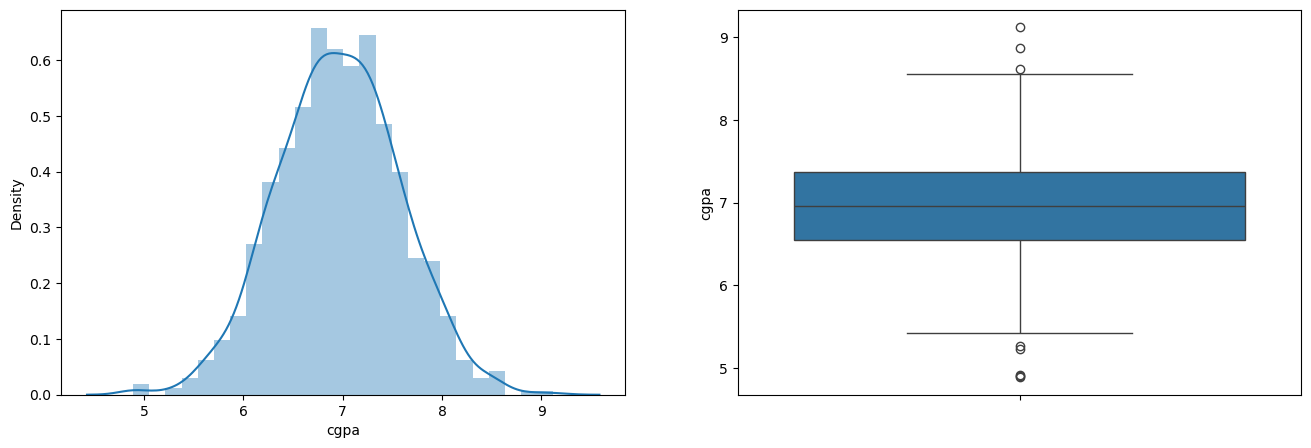

In [99]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(dp['cgpa'])

plt.subplot(1,2,2)
sns.boxplot(dp['cgpa'])

plt.show()

In [100]:
dp.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [101]:
# finding the boundaries value for detect outliers of "cgpa" column.
print('Highest allowed: ', dp['cgpa'].mean() + 3 * dp['cgpa'].std())
print('Lowest allowed: ', dp['cgpa'].mean() - 3 * dp['cgpa'].std())

Highest allowed:  8.808933625397168
Lowest allowed:  5.113546374602832


In [102]:
# Finding the outliers
dp[(dp['cgpa'] > 8.80) | (df['cgpa'] < 5.11)] # It show all outliers rows.

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [103]:
# Trimming --> rest data after remove outliers.
new_dp = dp[(dp['cgpa'] < 8.80) & (dp['cgpa'] > 5.11)]
new_dp.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


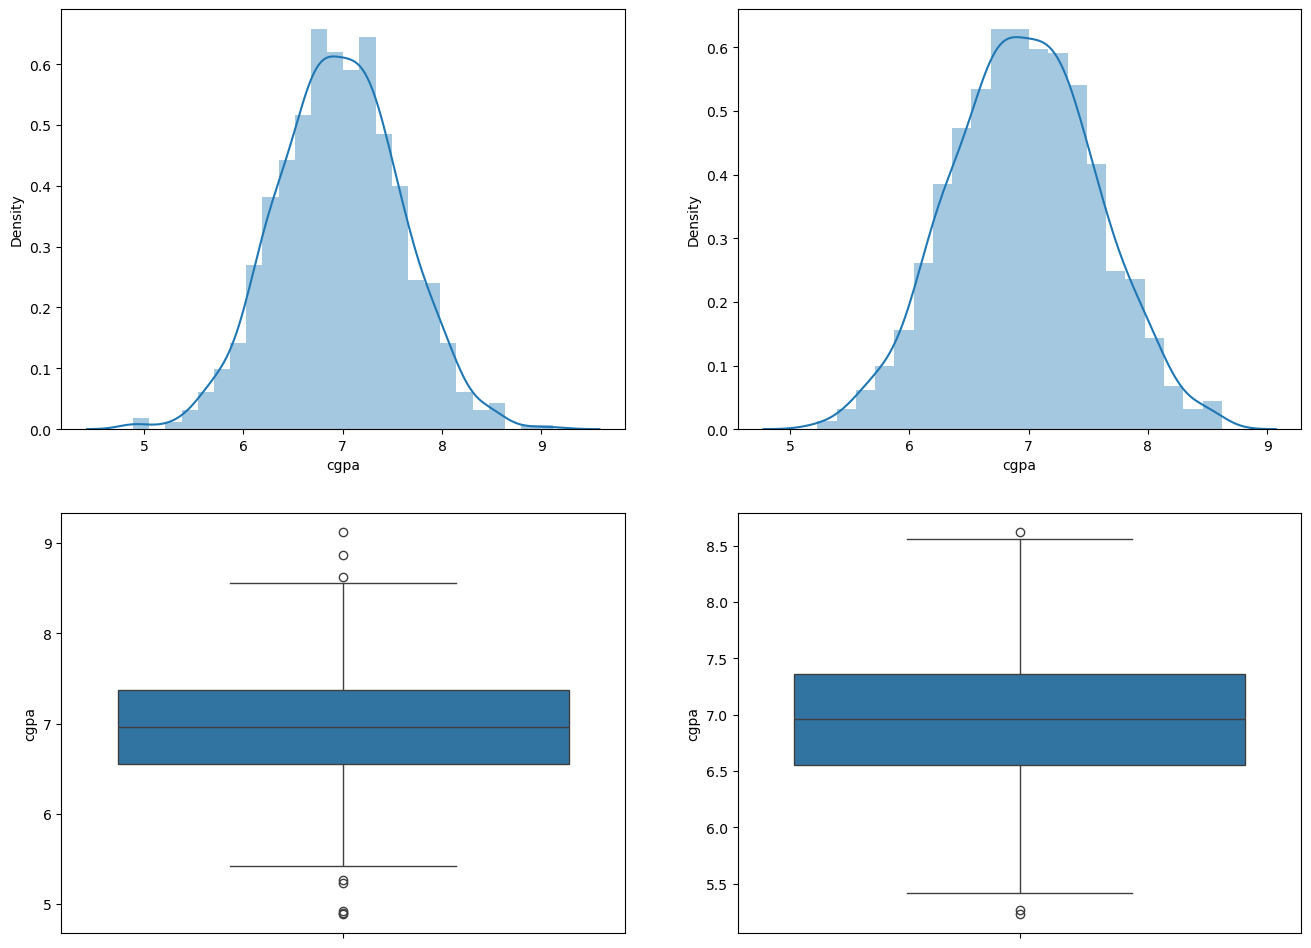

In [104]:
plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
sns.distplot(dp['cgpa'])


plt.subplot(2,2,2)
sns.distplot(new_dp['cgpa'])

plt.subplot(2,2,3)
sns.boxplot(dp['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(new_dp['cgpa'])
plt.show()

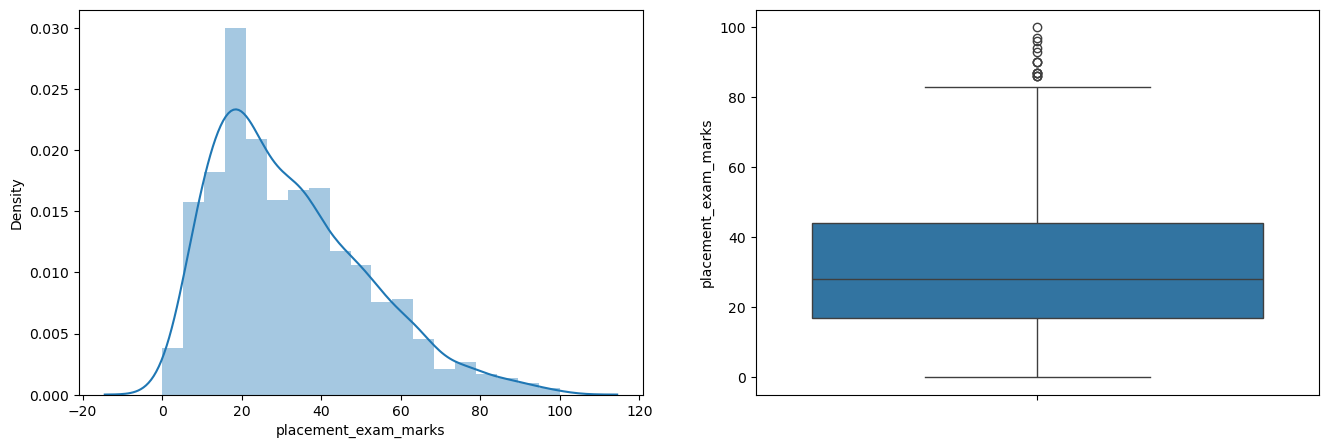

In [105]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(dp['placement_exam_marks'])

plt.subplot(1,2,2)
sns.boxplot(dp['placement_exam_marks'])

plt.show()

In [106]:
# Finding the boundaries for outliers of "placement_exam_marks" column.
print('Highest allowed: ', dp['placement_exam_marks'].mean() + 3 * dp['placement_exam_marks'].std())
print('Lowest allowed: ', dp['placement_exam_marks'].mean() - 3 * dp['placement_exam_marks'].std())

Highest allowed:  89.61746701676324
Lowest allowed:  -25.167467016763247


In [107]:
dp[(dp['placement_exam_marks'] > 89.6) | (dp['placement_exam_marks'] < -25.1)] # these are outliers.

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
134,6.33,93.0,0
162,7.80,90.0,0
324,6.64,90.0,0
630,6.56,96.0,1
730,6.14,90.0,1
846,6.99,97.0,0
917,5.95,100.0,0


In [108]:
# remove outliers and rest data fetch.
new_dp_p = dp[(dp['placement_exam_marks'] < 89.6) & (dp['placement_exam_marks'] > -25.1)]
new_dp_p

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [109]:
new_dp.shape

(995, 3)

In [110]:
new_dp_p.shape

(992, 3)

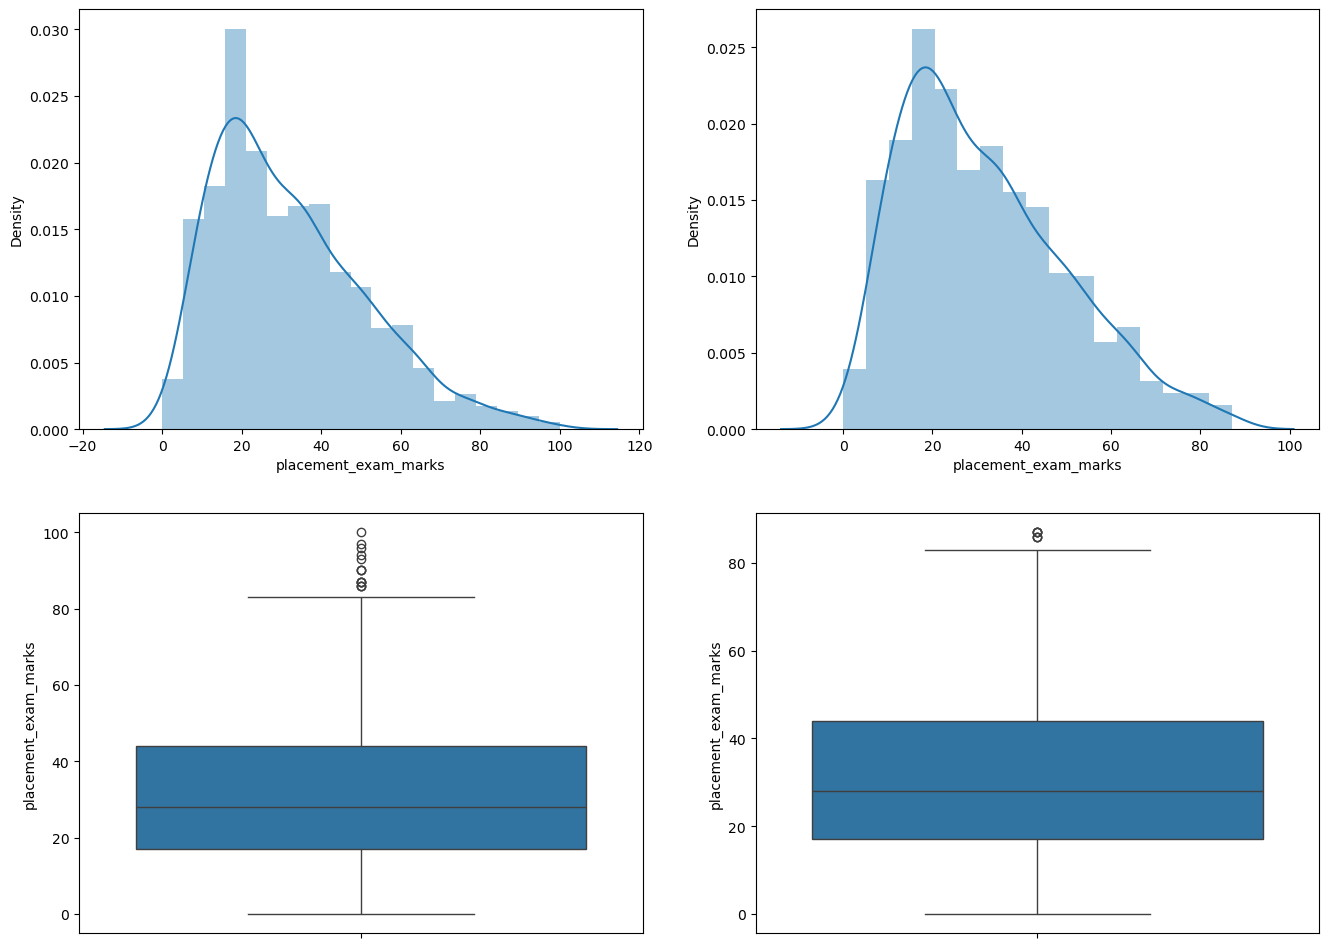

In [111]:
plt.figure(figsize = (16,12))
plt.subplot(2,2,1)
sns.distplot(dp['placement_exam_marks'])

plt.subplot(2,2,2)
sns.distplot(new_dp_p['placement_exam_marks'])

plt.subplot(2,2,3)
sns.boxplot(dp['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_dp_p['placement_exam_marks'])

plt.show()

In [112]:
# Detect and Remove Outliers using "ZScore Method".

In [113]:
ab = pd.read_csv('placement.csv')
ab.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [114]:
ab.shape

(1000, 3)

In [115]:
ab = ab[["cgpa", "placement_exam_marks"]]
ab.head()

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0


In [116]:
# First Manually find zscore in cgpa column.
ab['cgpa_zscore'] = (ab['cgpa'] - ab['cgpa'].mean()) / (ab['cgpa'].std())
ab

,cgpa,placement_exam_marks,cgpa_zscore
0,7.19,26.0,0.371425
1,7.46,38.0,0.809810
2,7.54,40.0,0.939701
3,6.42,8.0,-0.878782
4,7.23,17.0,0.436371
...,...,...,...
995,8.87,44.0,3.099150
996,9.12,65.0,3.505062
997,4.89,34.0,-3.362960
998,8.62,46.0,2.693239


In [117]:
ab[ab['cgpa_zscore'] < -3] # these are outliers.

,cgpa,placement_exam_marks,cgpa_zscore
485,4.92,44.0,-3.314251
997,4.89,34.0,-3.362960
999,4.90,10.0,-3.346724


In [118]:
ab[ab['cgpa_zscore'] > 3] # These are outliers.

,cgpa,placement_exam_marks,cgpa_zscore
995,8.87,44.0,3.099150
996,9.12,65.0,3.505062


In [119]:
ab1 = ab[(ab['cgpa_zscore'] >-3) & (ab['cgpa_zscore'] < 3)]
ab1

,cgpa,placement_exam_marks,cgpa_zscore
0,7.19,26.0,0.371425
1,7.46,38.0,0.809810
2,7.54,40.0,0.939701
3,6.42,8.0,-0.878782
4,7.23,17.0,0.436371
...,...,...,...
991,7.04,57.0,0.127878
992,6.26,12.0,-1.138565
993,6.73,21.0,-0.375452
994,6.48,63.0,-0.781363


In [120]:
ab.shape

(1000, 3)

In [121]:
ab1.shape

(995, 3)

In [122]:
# Working on original ZScore method.

In [123]:
bb = pd.read_csv('placement.csv')
bb.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [124]:
bb1 = bb[['cgpa', 'placement_exam_marks']]
bb1

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0
...,...,...
995,8.87,44.0
996,9.12,65.0
997,4.89,34.0
998,8.62,46.0


In [125]:
bb1.isnull().sum()

cgpa                    0
placement_exam_marks    0
dtype: int64

In [126]:
bb1.shape

(1000, 2)

In [127]:
from scipy.stats import zscore
z = np.abs(zscore(bb1))
bb2 = bb1[(z<3).all(axis = 1)]
bb2.shape

(987, 2)

In [128]:
###################################################################################################################

In [129]:
# Encoding --> First method ==> OneHotEncoding.

In [130]:
# First we are working on dummy data.

In [131]:
# create dummy data.

d1 = {'Name': ["Abhishek", "Naman", "Rohit"]}
d2 = pd.DataFrame(d1)
d2

,Name
0,Abhishek
1,Naman
2,Rohit


In [132]:
# now encoding this text to numeric form.

# first method ==> getdummies(it means categorical data convert into numerical data)
name = pd.get_dummies(d1['Name']).astype(int)
name

,Abhishek,Naman,Rohit
0,1,0,0
1,0,1,0
2,0,0,1


In [133]:
name = pd.get_dummies(d1['Name'], drop_first = True).astype(int)
name

,Naman,Rohit
0,0,0
1,1,0
2,0,1


In [134]:
df = pd.read_csv('cars.csv')   
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [135]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [136]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [137]:
owner = df['owner']

owner = (pd.get_dummies(owner, drop_first = True)).astype(int)
owner

,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
8123,0,0,0,0
8124,1,0,0,0
8125,0,0,0,0
8126,0,0,0,0


In [138]:
fuel = df['fuel']

fuel = (pd.get_dummies(fuel, drop_first = True)).astype(int)
fuel

,Diesel,LPG,Petrol
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
8123,0,0,1
8124,1,0,0
8125,1,0,0
8126,1,0,0


In [139]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [140]:
brand = df['brand']
brand = (pd.get_dummies(brand, drop_first = True)).astype(int)
brand

,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [141]:
df1 = pd.concat([df,fuel, owner, brand], axis = 1)
df1.head()

,brand,km_driven,fuel,owner,selling_price,Diesel,LPG,Petrol,Fourth & Above Owner,Second Owner,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Maruti,145500,Diesel,First Owner,450000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Skoda,120000,Diesel,Second Owner,370000,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,Honda,140000,Petrol,Third Owner,158000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai,127000,Diesel,First Owner,225000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Maruti,120000,Petrol,First Owner,130000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df1.drop(['fuel', 'owner', 'brand'], axis = 1, inplace = True)
df1.head()

,km_driven,selling_price,Diesel,LPG,Petrol,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Ashok,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,145500,450000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,370000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,140000,158000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,127000,225000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120000,130000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# OneHotEncoding is completed --------------------------------------------------------------

# This encoding is done by manually, Now we use library "sklearn" for encoding.


In [144]:
dff1 = pd.read_csv('cars.csv')
dff1.head(3)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000


In [145]:
dff2 = dff1[["brand", "fuel", "owner"]]

In [146]:
dff2.head(3)

,brand,fuel,owner
0,Maruti,Diesel,First Owner
1,Skoda,Diesel,Second Owner
2,Honda,Petrol,Third Owner


In [147]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first', sparse_output = False, dtype = np.int32)

In [148]:
dff2 = ohe.fit_transform(dff2) # learn and convert
dff2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [149]:
dff3 = pd.DataFrame(dff2)
dff3.head(3)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [150]:
# Completed OneHotEncoding ----------------------------------------------------------

In [151]:
# 2. Ordinal Encoding start (first manually, then use sklearn.) ------------

In [152]:
df = pd.read_csv('customer.csv') 
df.head(3)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No


In [153]:
df.isnull().sum()

age          0
gender       0
review       0
education    0
purchased    0
dtype: int64

In [154]:
df['review'].value_counts()

review
Poor       18
Good       18
Average    14
Name: count, dtype: int64

In [155]:
# In ordinal encoding - we have to map with categories of columns with 0,1,2,3....
# and we have to map for all columns.
df['review'] = df['review'].map({'Poor':0, 'Average':1, 'Good':2})
df.head(3)

,age,gender,review,education,purchased
0,30,Female,1,School,No
1,68,Female,0,UG,No
2,70,Female,2,PG,No


In [156]:
df['gender'].value_counts()

gender
Female    29
Male      21
Name: count, dtype: int64

In [157]:
df['gender'] = df['gender'].map({"Female":0, "Male":1})
df.head(3)

,age,gender,review,education,purchased
0,30,0,1,School,No
1,68,0,0,UG,No
2,70,0,2,PG,No


In [158]:
df['education'].value_counts()

education
PG        18
School    16
UG        16
Name: count, dtype: int64

In [159]:
df['education'] = df['education'].map({"School":0, "UG":1, "PG":2})
df.head(3)

,age,gender,review,education,purchased
0,30,0,1,0,No
1,68,0,0,1,No
2,70,0,2,2,No


In [160]:
df['purchased'].value_counts()

purchased
No     26
Yes    24
Name: count, dtype: int64

In [161]:
df['purchased'] = df['purchased'].map({"No":0, "Yes":1})
df.head(3)

,age,gender,review,education,purchased
0,30,0,1,0,0
1,68,0,0,1,0
2,70,0,2,2,0


In [162]:
# Manually ordinal encoding is done ------
# now we are using sklearn for ordinal encoding.

In [163]:
df = pd.read_csv('customer.csv')
df.head(3)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No


In [164]:
df1 = df[['review', 'education', 'gender', 'purchased']]
df1.head(3)

,review,education,gender,purchased
0,Average,School,Female,No
1,Poor,UG,Female,No
2,Good,PG,Female,No


In [165]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [["Poor", 'Average', 'Good'], ['School', 'UG', 'PG'], ['Male', 'Female'], ['No', 'Yes']])
df2 = oe.fit_transform(df1)
df2

array([[1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [2., 2., 1., 0.],
       [2., 2., 1., 0.],
       [1., 1., 1., 0.],
       [1., 0., 1., 1.],
       [2., 0., 0., 0.],
       [0., 0., 1., 1.],
       [1., 1., 1., 0.],
       [2., 1., 0., 1.],
       [2., 1., 1., 1.],
       [2., 1., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [0., 2., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 1.],
       [0., 1., 1., 1.],
       [2., 0., 0., 0.],
       [0., 2., 0., 1.],
       [1., 0., 1., 1.],
       [1., 2., 0., 0.],
       [0., 2., 1., 1.],
       [2., 0., 1., 0.],
       [1., 2., 1., 1.],
       [2., 0., 1., 0.],
       [0., 2., 1., 0.],
       [0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 0., 0.],
       [0., 0., 1., 1.],
       [1., 1., 0., 1.],
       [2., 2., 1., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [2., 1., 1., 1.],
       [1., 2., 0., 1.],
       [2., 0., 1., 0.],
       [0., 2., 0., 0.],


In [166]:
df3 = pd.DataFrame(df2,columns = ['review_n', 'education_n', 'gender_n', 'purchased_n'])
df3.head()

,review_n,education_n,gender_n,purchased_n
0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,2.0,2.0,1.0,0.0
3,2.0,2.0,1.0,0.0
4,1.0,1.0,1.0,0.0


In [167]:
# merge old and new
df4 = pd.concat([df1, df3], axis = 1)
df4.head()

,review,education,gender,purchased,review_n,education_n,gender_n,purchased_n
0,Average,School,Female,No,1.0,0.0,1.0,0.0
1,Poor,UG,Female,No,0.0,1.0,1.0,0.0
2,Good,PG,Female,No,2.0,2.0,1.0,0.0
3,Good,PG,Female,No,2.0,2.0,1.0,0.0
4,Average,UG,Female,No,1.0,1.0,1.0,0.0


In [168]:
# drop old columns
df4.drop(['review', 'education', 'gender', 'purchased'], axis = 1, inplace = True)
df4.head()

,review_n,education_n,gender_n,purchased_n
0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,2.0,2.0,1.0,0.0
3,2.0,2.0,1.0,0.0
4,1.0,1.0,1.0,0.0


In [169]:
# rename new columns to new columns.
df_new = df4.rename(columns = {"review_n": 'review', 'education_n': 'education', 'gender_n':'gender', 'purchased_n':'purchased'})
df_new.head(3)

,review,education,gender,purchased
0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,2.0,2.0,1.0,0.0


In [170]:
# Ordinal encoding is done ------------------------------------------------------------------------------------

In [171]:
# -------------------------------------------------------------------------------------------------------------

In [172]:
# Third type of encoding -->> "Label Encoding" 

In [173]:
df = pd.read_csv('loan_prediction.csv') 
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [174]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [175]:
df['Gender'].fillna("Unknown", inplace = True)

In [176]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [177]:
df['Married'].unique() # Married have only 3 missing values, so we fill this using mode method.

array(['No', 'Yes', nan], dtype=object)

In [178]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

In [179]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [180]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [181]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [182]:
df['Self_Employed'].fillna("NA", inplace = True)

In [183]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [184]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

In [185]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [186]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

In [187]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [188]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [189]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [190]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [191]:
numerical = df.select_dtypes(exclude = 'object')
categorical = df.select_dtypes(include = 'object')
numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [192]:
categorical

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [193]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [194]:
# using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    print(i)

Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [195]:
for i in categorical:
    df[i] = le.fit_transform(df[i])

In [196]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1


In [197]:
# Label Encoding is done using sklearn---------------------------------------------------------------------

In [198]:
# Now working on other data.

In [199]:
da = pd.read_csv('Telecom_customer_churn.csv')
da.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [200]:
da.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [201]:
da.drop('customerID', axis = 1, inplace = True)
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [202]:
da.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [203]:
da.duplicated().sum()

22

In [204]:
# drop duplicate values but first value keep always.
da.drop_duplicates(keep = 'last', inplace = True)
da.duplicated().sum()

0

In [205]:
da.shape

(7021, 20)

In [206]:
da['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [207]:
# Now we are checking whitespace, NA, - 
da[da['TotalCharges'].isin([' ', 'NA', '-']) == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [208]:
# Now we are checking for any whitespaces, NA, - in this dataset. 
da[da['TotalCharges'].isin([' ', 'NA', '-'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [209]:
# There is possibility of Whitespaces in TotalCharges column, lets deal with it.
# Replacing whitespaces with null values.
da['TotalCharges'] = da['TotalCharges'].replace(' ', np.nan)

In [210]:
# Converting object datatype into float
da['TotalCharges'] = da['TotalCharges'].astype(float)

In [211]:
import seaborn as sns
sns.boxplot(da['TotalCharges'])

<Axes: ylabel='TotalCharges'>

In [212]:
da['TotalCharges'].fillna(da['TotalCharges'].mean(), inplace = True)

In [213]:
numerical = da.select_dtypes(exclude = 'object')
categorical = da.select_dtypes(include = 'object')

In [214]:
# using encoding --> Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    da[i] = le.fit_transform(da[i])

In [215]:
da.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [216]:
# Completed Label Encoding on this data.-----------------

In [217]:
# Now Enconding on other dataset.

In [218]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head(3) 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [219]:
numerical = df.select_dtypes(exclude = 'object')
categorical = df.select_dtypes(include = 'object')

In [220]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    df[i] = le.fit_transform(df[i])

In [221]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0


In [222]:
# Completed LabelEncoding on this data.

In [223]:
# ######################################################################################################1

In [224]:
# Scaling ==> to scale down the values for better performance of ML algo 
  # 1. Standard Scaling ==> use for big data ---> formula ==> (x - u / sigma)
  # 2. MinMax Scaler ==> small data.  ----> formula ==>  (x - xmin / xmax - xmin)
# It is a permenent step.
# Scaling is done on numerical values.

In [225]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(3) 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [226]:
df1 = df[['Age', 'EstimatedSalary']]
df1.head(3)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000


In [227]:
df1.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [228]:
# Focus on std, and min because there is a big difference in it.

In [229]:
# Using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1_sc = sc.fit_transform(df1)
df1_sc

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [230]:
df2 = pd.DataFrame(df1_sc, columns = ['Age', 'EstimatedSalary'])

In [231]:
np.round(df2.describe(), 2)   # round 2, it means 2 digit after decimal.

,Age,EstimatedSalary
count,400.00,400.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.88,-1.61
25%,-0.76,-0.79
50%,-0.06,0.01
75%,0.80,0.54
max,2.13,2.36


In [232]:
# Completed Scaling part on this dataset ----------------------------------------

In [233]:
# ###################################################################################################

In [234]:
# Now we are seeing cleaning part and extract day,month, year, hour, minutes.

In [235]:
df = pd.read_excel('Data_Train.xlsx')
df.head(3) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [236]:
# Extract day, month, year from date column.

df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day

In [237]:
df.head(3) # show Journey_day column, it will be add in the end of this dataset.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9


In [238]:
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month

In [239]:
df['Journey_year'] = pd.to_datetime(df['Date_of_Journey']).dt.year

In [240]:
df['weekday'] = pd.to_datetime(df['Date_of_Journey']).dt.day_name()

In [241]:
df['month_name'] = pd.to_datetime(df['Date_of_Journey']).dt.month_name()

In [242]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,weekday,month_name
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Sunday,March
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,Wednesday,May
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,Sunday,June


In [243]:
# Extract time

df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,weekday,month_name,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Sunday,March,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,Wednesday,May,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,Sunday,June,9,25


In [244]:
# Q1. In Duration column --> cleaning part ==> In some places, both "hour" and "minute" are written. 
   # In some places, only minutes and in some places only hours is written.

# Solution ==> change it complete minutes.

s1 = "4h 45m" # 285 minutes
s1.replace("h", "*60").replace(" ","+").replace("m", "*1")#Mathematically, this is how it should be done.

'4*60+45*1'

In [245]:
# Now perform this code on duration column.
df['Duration'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,weekday,month_name,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,Sunday,March,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019,Wednesday,May,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,2019,Sunday,June,9,25


In [246]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [247]:
# Q2. In this Destination column, here is a mistake ==>> New Delhi and Delhi, these are same locations.

In [248]:
df['Destination'].replace({'Delhi':'New Delhi'}, inplace = True)

In [249]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [250]:
# Check Additional_Info column
df['Additional_Info'].unique() # Here is a problem "No info" and "No Info" Both are same but written not same.

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [251]:
df['Additional_Info'].replace({"No info":"No Info"}, inplace = True)
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [252]:
# Cleaning part is done -------------------------------------------------------------------------------------

In [253]:
######################################################################################################3

In [254]:
# Now working on other dataset. ==> use MinMaxScaler for scaling.

In [255]:
da = pd.read_csv('wine_data.csv')
da.head(3) 

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [256]:
df = pd.read_csv('wine_data.csv', header = None, usecols = [0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [257]:
X = df[['Alcohol', 'Malic acid']]
X

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [258]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [259]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [260]:
np.round(X.describe(), 1)

,Alcohol,Malic acid
count,178.0,178.0
mean,13.0,2.3
std,0.8,1.1
min,11.0,0.7
25%,12.4,1.6
50%,13.0,1.9
75%,13.7,3.1
max,14.8,5.8


In [261]:
np.round(X_scaled.describe(), 1) # In MinMax ==> difference is min 0, and max = 1.

,Alcohol,Malic acid
count,178.0,178.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [262]:
# Completed MinMaxScaling -------------------------------------------------------------------------------

In [263]:
#########################################################################################################

In [264]:
# Work on Next dataset ------------

In [265]:
# EDA and Use ML steps.

In [266]:
dfi = pd.read_excel('Data_Train.xlsx')
dfi.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [267]:
# Extract Date, month, year, day_name, month_name from the Date_of_Journey column of the DataSet.

dfi['Journey_Day'] = pd.to_datetime(dfi['Date_of_Journey']).dt.day
dfi['Journey_Month'] = pd.to_datetime(dfi['Date_of_Journey']).dt.month
dfi['Journey_Year'] = pd.to_datetime(dfi['Date_of_Journey']).dt.year
dfi['Day_Name'] = pd.to_datetime(dfi['Date_of_Journey']).dt.day_name()
dfi['Month_Name'] = pd.to_datetime(dfi['Date_of_Journey']).dt.month_name()

dfi.drop('Date_of_Journey', axis = 1, inplace = True)
dfi.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Day_Name,Month_Name
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Sunday,March
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,Wednesday,May
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,Sunday,June


In [268]:
# Arrival_Time & Dep_Time, extract -->  Arrival_Hour, Arrival_Minutes & Dep_Hour, Dep_Minutes.

dfi['Dep_Hour'] = pd.to_datetime(dfi['Dep_Time']).dt.hour
dfi['Dep_Minutes'] = pd.to_datetime(dfi['Dep_Time']).dt.minute
dfi['Arrival_Hour'] = pd.to_datetime(dfi['Arrival_Time']).dt.hour
dfi['Arrival_Minute'] = pd.to_datetime(dfi['Arrival_Time']).dt.minute

dfi.drop('Dep_Time', axis = 1, inplace = True)
dfi.drop('Arrival_Time', axis = 1, inplace = True)

dfi.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Day_Name,Month_Name,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,Sunday,March,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,Wednesday,May,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,Sunday,June,9,25,4,25


In [269]:
# Duration ==> It is in hour+min or hour or min writter ==> Convert completely in minutes.
dfi['Duration_Minutes'] = dfi['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
dfi.drop('Duration', axis = 1, inplace = True)
dfi.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Day_Name,Month_Name,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,Sunday,March,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,Wednesday,May,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,Sunday,June,9,25,4,25,1140


In [270]:
dfi.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Total_Stops         1
Additional_Info     0
Price               0
Journey_Day         0
Journey_Month       0
Journey_Year        0
Day_Name            0
Month_Name          0
Dep_Hour            0
Dep_Minutes         0
Arrival_Hour        0
Arrival_Minute      0
Duration_Minutes    0
dtype: int64

In [271]:
# Only 1 null values, so we drop this one null value.
dfi.dropna(inplace = True)
dfi.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Journey_Day         0
Journey_Month       0
Journey_Year        0
Day_Name            0
Month_Name          0
Dep_Hour            0
Dep_Minutes         0
Arrival_Hour        0
Arrival_Minute      0
Duration_Minutes    0
dtype: int64

In [272]:
# Encoding

# For encoding extract categorical columns from the dataset.
categorical = dfi.select_dtypes(include = 'object')


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    dfi[i] = le.fit_transform(dfi[i])


dfi.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Day_Name,Month_Name,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,3,0,5,18,4,8,3897,24,3,2019,3,2,22,20,1,10,170
1,1,3,0,84,1,8,7662,1,5,2019,6,3,5,50,13,15,445
2,4,2,1,118,1,8,13882,9,6,2019,3,1,9,25,4,25,1140


In [273]:
# Remove Outliers using Zscore method.

from scipy.stats import zscore
z = np.abs(zscore(dfi))
dfi1 = dfi[(z<3).all(axis=1)]

In [274]:
dfi.shape

(10682, 17)

In [275]:
dfi1.shape

(0, 17)